In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from Kernel import RBF, GaussianProcessRegressor

np.random.seed(1234)
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def create_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(*domain, sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def kernel(x, y, param = [1, 1, 0, 0], pairwise=True):
    if pairwise:
        x, y = (np.tile(x, (len(y), 1)).transpose(1, 0), np.tile(y, (len(x), 1)))
    return param[0] * np.exp(-0.5 * param[1] * (x - y) ** 2) + param[2] + param[3] * np.multiply(x, y)

This example shows that learning hyperparameters of Radial Basis Function (RBF) can largely improve curve fitting. The initial parameter value is [1., 1.]

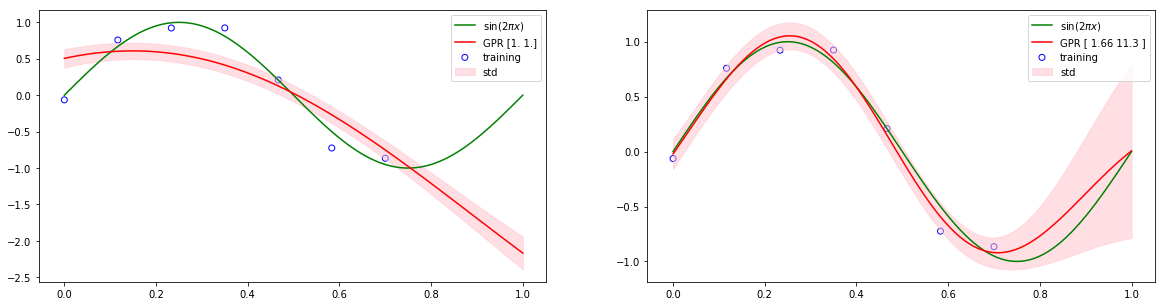

In [2]:
x_train, t_train = create_data(sinusoidal, 7, std=0.1, domain=[0., 0.7])
x = np.linspace(0, 1, 100)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model = GaussianProcessRegressor(kernel=RBF(np.array([1., 1.])), beta=100)
model.fit(x_train, t_train, iter_max=0)
t, t_std = model.predict(x, with_error=True)
plt.scatter(x_train, t_train, facecolor="none", edgecolor="b", color="blue", label="training")
plt.plot(x, sinusoidal(x), color="g", label="sin$(2\pi x)$")
plt.plot(x, t, color="r", label="GPR {}".format(model.kernel.params))
plt.fill_between(x, t - t_std, t + t_std, alpha=0.5, color="pink", label="std")
plt.legend()

plt.subplot(1, 2, 2)
model.fit(x_train, t_train, iter_max=100)
t, t_std = model.predict(x, with_error=True)
plt.scatter(x_train, t_train, facecolor="none", edgecolor="b", color="blue", label="training")
plt.plot(x, sinusoidal(x), color="g", label="sin$(2\pi x)$")
plt.plot(x, t, color="r", label="GPR {}".format(np.round(model.kernel.params, 2)))
plt.fill_between(x, t - t_std, t + t_std, alpha=0.5, color="pink", label="std")
plt.legend()
plt.show()